## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# 把兩個訓練資料集和測試資料集讀進來
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")


## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [4]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
df_train.info()
df_test.info()
#由此可知Test 資料集沒有 'Survived'這個欄位


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [5]:
#可以嘗試用範例的程式
print(df_train.isnull().any())
print("Train_train資料集中有",df_train.isnull().any().sum(),"個列有缺失資料")
print(df_test.isnull().any())
print("Test_train資料集中有",df_test.isnull().any().sum(),"個列有缺失資料")


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
Train_train資料集中有 3 個列有缺失資料
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
Test_train資料集中有 3 個列有缺失資料


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [26]:
#合併資料
df_merge=pd.concat([df_train,df_test])

29.881137667304014
14.413493211271334


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


23.87751718869366
17.590844644704124


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


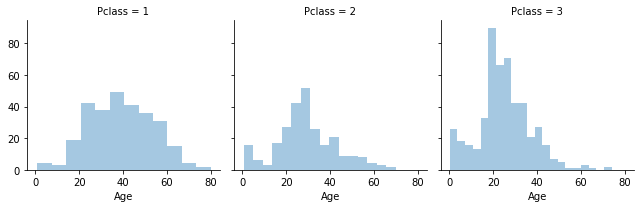

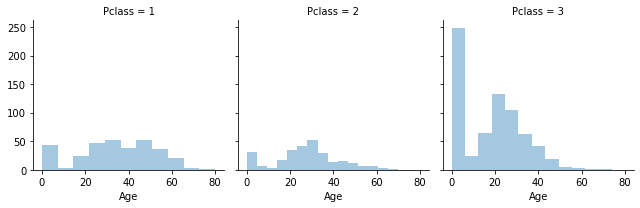

In [27]:
# 以 Age 為例，看Cabin，進行補值，補固定值為0
#補值前 平均值
print(df_merge['Age'].mean()) #Age平均
print(df_merge['Age'].std()) #Age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_merge, col='Pclass')
g.map(sns.distplot, 'Age', kde=False)

#補值後
df_merge['Age']=df_merge['Age'].fillna(0)
print(df_merge['Age'].mean())
print(df_merge['Age'].std()) #Age標準差
df_merge[df_merge['Age'].isnull().values==True]
#平均值和標準差上有較大的差異，
# 連續型用分布圖行來看
g = sns.FacetGrid(df_merge, col='Pclass')
g.map(sns.distplot, 'Age', kde=False)

28.95685760341532
12.889194563198611


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


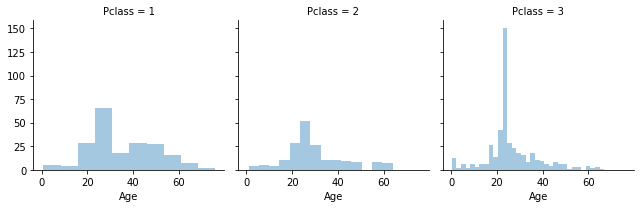

In [30]:
# 以 Age 為例,補平均值

#補值後
df_test2 = df_merge.copy()
df_test2['Age']=df_test['Age'].fillna(df_test2['Age'].mean())
print(df_test2['Age'].mean())
print(df_test2['Age'].std()) #Age標準差
df_test2[df_test2['Age'].isnull().values==True]
#補完平均數後，平均數上差異性沒那麼大，標準差相差較大
# 連續型用分布圖行來看
g = sns.FacetGrid(df_test2, col='Pclass')
g.map(sns.distplot, 'Age', kde=False)

30.125
13.897272109871361


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


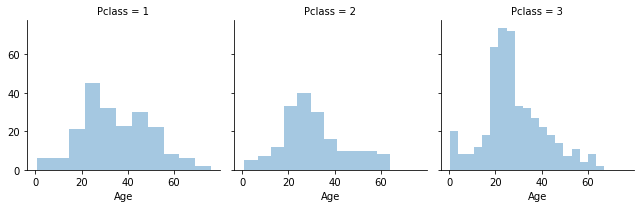

In [31]:
# 以 Age 為例,由後往前補

#補值後
df_test3 = df_merge.copy()
df_test3['Age']=df_test['Age'].fillna(method='pad')
print(df_test3['Age'].mean())
print(df_test3['Age'].std()) 
df_test3[df_test3['Age'].isnull().values==True]
#補完平均數後，平均數上差異不大，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df_test3, col='Pclass')
g.map(sns.distplot, 'Age', kde=False)